Download a dataset and visualize it

In [1]:
pip install pandas matplotlib seaborn

In [2]:
import matplotlib.pyplot as plt
import pandas
import seaborn as sns

In [3]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# The iris dataset is a classic and very easy multi-class classification dataset.

In [4]:
data = load_iris()
print(data.target)
print(data.target_names)
print(data.feature_names)

# Let’s say you are interested in the samples 10, 25, and 50, and want to know their class name.

print(data.target[[10, 25, 50]]) # -> 3 bc there are three classes! With 50 samples per class
print(data.target_names)
print(data.feature_names)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[0 0 1]
['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [5]:
# Can have the infos also in a pandas df automatically from the library!!!

data_pd = load_iris(as_frame=True)

print(data_pd)

{'data':      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns], 'target': 0      0
1      0
2 

In [6]:
df = pandas.DataFrame(data.data, columns=data.feature_names)
df["target"] = data.target # Targets
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


# Create now a dispersion graph between two characteristics of the dataset

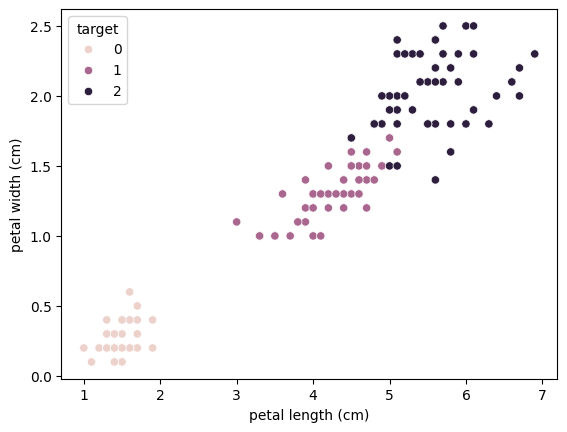

In [7]:
sns.scatterplot(x=df["petal length (cm)"], y=df["petal width (cm)"], hue=df["target"])
plt.show()

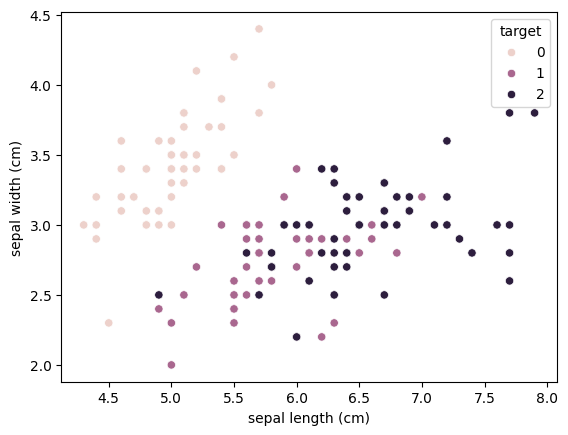

In [8]:
sns.scatterplot(x=df["sepal length (cm)"], y=df["sepal width (cm)"], hue=df["target"])
plt.show()

In [9]:
# Split in training (80%) and test(20%)

X = df.drop(columns=["target"])
y = df["target"] # My target

X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.2, train_size=0.8, shuffle=True)

print(y_test)

51     1
121    2
134    2
19     0
61     1
59     1
70     1
34     0
93     1
100    2
146    2
66     1
35     0
2      0
111    2
36     0
76     1
14     0
84     1
5      0
58     1
25     0
149    2
41     0
109    2
140    2
97     1
32     0
80     1
75     1
Name: target, dtype: int64


In [10]:
# Choose a model to train, in this case, regression NN

from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [11]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
print(model.predict_proba(X_test))
print(model.score(X_test, y_test))

acc = accuracy_score(y_test, y_pred)
print(f"Accuratezza: {acc:.2f}")

[[7.80127976e-03 8.04722419e-01 1.87476301e-01]
 [9.34648314e-04 1.82478313e-01 8.16587038e-01]
 [1.20873068e-04 2.23943613e-01 7.75935514e-01]
 [9.82359287e-01 1.76405620e-02 1.51421457e-07]
 [1.97446067e-02 8.54643518e-01 1.25611875e-01]
 [5.17915674e-02 8.78672470e-01 6.95359627e-02]
 [3.08663313e-03 3.71660939e-01 6.25252428e-01]
 [9.62561906e-01 3.74378419e-02 2.51947631e-07]
 [1.31718282e-01 8.63259358e-01 5.02235995e-03]
 [2.19028180e-06 4.68651939e-03 9.95311290e-01]
 [3.75935938e-04 2.79523005e-01 7.20101059e-01]
 [1.16614831e-02 7.08560649e-01 2.79777868e-01]
 [9.80708929e-01 1.92910143e-02 5.63202579e-08]
 [9.82328785e-01 1.76711327e-02 8.24126265e-08]
 [1.32333599e-04 1.56426953e-01 8.43440714e-01]
 [9.74141096e-01 2.58588321e-02 7.21683374e-08]
 [1.53055816e-03 7.83768680e-01 2.14700762e-01]
 [9.85802954e-01 1.41970190e-02 2.66218083e-08]
 [1.36715915e-02 6.78483552e-01 3.07844857e-01]
 [9.68379766e-01 3.16197351e-02 4.98924238e-07]
 [3.70234041e-03 8.71646700e-01 1.246509

In [12]:
# Prediction

new_flower = [[5.1, 3.5, 1.4, 0.2]]
prediction = model.predict(new_flower)
print(f"Predizione: {data.target_names[prediction[0]]}")

Predizione: setosa


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


# It is also possible to use Keras to reach the same result ⏬

In [13]:
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler

# Before the training we need to normalize the inputs!

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) # Fit to data, then transform it. Fits transformer to X and y with optional parameters fit_params and returns a transformed version of X.
X_test = scaler.transform(X_test) # Perform standardization by centering and scaling.


In [14]:
print(X_train, X_test)

[[-0.07591529 -0.82945977  0.73915997  0.91533305]
 [ 0.15767023  0.80994307  0.40147268  0.52069844]
 [-0.89346461  1.51254428 -1.28696381 -1.05783999]
 [-1.24384289  0.80994307 -1.06183894 -1.32092973]
 [ 0.50804851  0.57574266  0.51403511  0.52069844]
 [-1.24384289  0.80994307 -1.23068259 -1.32092973]
 [ 0.97521955  0.57574266  1.07684727  1.70460226]
 [-1.47742841  1.27834388 -1.56836989 -1.32092973]
 [-1.01025737  0.80994307 -1.28696381 -1.32092973]
 [-0.89346461 -1.29786058 -0.44274557 -0.13702591]
 [-0.19270805 -0.36105896  0.23262903  0.12606383]
 [ 1.44239059 -0.12685855  1.1894097   1.17842279]
 [-0.42629357 -1.06366017  0.34519146 -0.00548104]
 [-1.36063565  0.34154226 -1.23068259 -1.32092973]
 [ 0.39125575 -0.59525936  0.57031632  0.78378818]
 [ 1.20880507  0.10734185  0.73915997  1.44151253]
 [ 0.97521955 -0.12685855  0.68287876  0.65224331]
 [-0.19270805 -1.06366017 -0.16133949 -0.26857077]
 [ 0.50804851 -1.29786058  0.62659754  0.38915357]
 [ 0.62484127  0.10734185  0.96

In [15]:
print(y_train, y_test)

142    2
85     1
21     0
24     0
56     1
      ..
116    2
50     1
104    2
123    2
88     1
Name: target, Length: 120, dtype: int64 51     1
121    2
134    2
19     0
61     1
59     1
70     1
34     0
93     1
100    2
146    2
66     1
35     0
2      0
111    2
36     0
76     1
14     0
84     1
5      0
58     1
25     0
149    2
41     0
109    2
140    2
97     1
32     0
80     1
75     1
Name: target, dtype: int64


In [16]:
# Create the model
modelTF = keras.Sequential([
    layers.Dense(64, activation="relu"),  # Hidden layer
    layers.Dense(32, activation="relu"),
    layers.Dense(3, activation="softmax")  # Output (3 classi)
])

In [17]:
# Compile the model
modelTF.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [18]:
history = modelTF.fit(X_train,
                    y_train,
                    epochs=70,
                    batch_size=10,
                    validation_data=(X_test, y_test))

Epoch 1/70
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - accuracy: 0.7049 - loss: 0.9492 - val_accuracy: 0.6000 - val_loss: 0.8213
Epoch 2/70
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8287 - loss: 0.6862 - val_accuracy: 0.6667 - val_loss: 0.7112
Epoch 3/70
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.8592 - loss: 0.5290 - val_accuracy: 0.6667 - val_loss: 0.6282
Epoch 4/70
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8620 - loss: 0.4431 - val_accuracy: 0.6667 - val_loss: 0.5694
Epoch 5/70
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8785 - loss: 0.4152 - val_accuracy: 0.7000 - val_loss: 0.5241
Epoch 6/70
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8946 - loss: 0.3604 - val_accuracy: 0.7333 - val_loss: 0.4844
Epoch 7/70
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8660 - loss: 0.3339 - val_accuracy: 0.7667 - val_loss: 0.4526
Epoch 8/70
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.8969 - loss: 0.2388 - val_accuracy: 0.7667 - v

In [19]:
history_dict = history.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

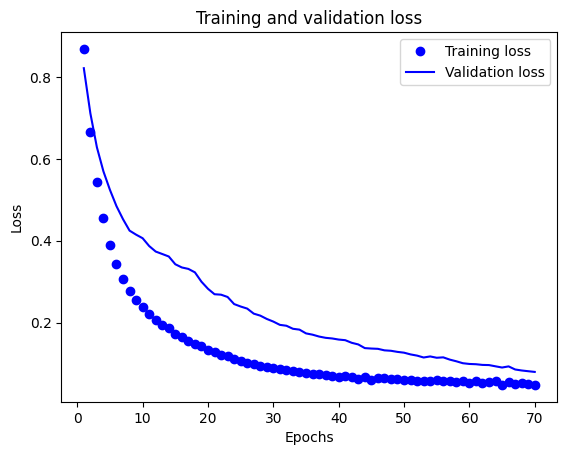

In [20]:
# Plot training and validation loss

import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

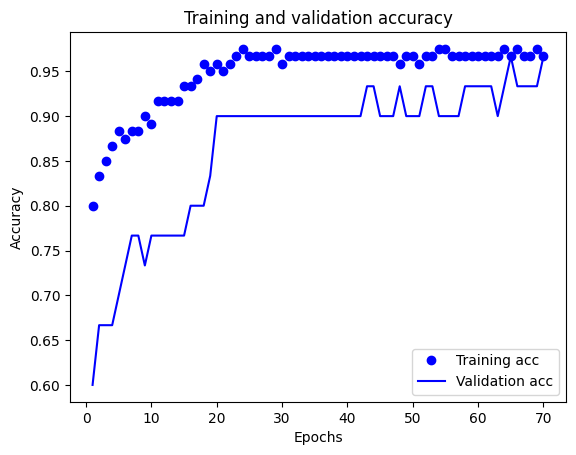

In [21]:
# Plot training and validation accuracy


plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [22]:
test_loss, test_acc = modelTF.evaluate(X_test, y_test)
print(f"Accuratezza del modello: {test_acc:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step - accuracy: 0.9667 - loss: 0.0798
Accuratezza del modello: 0.97


# Predict the lenght of the petals using the other flower's characteristics ⏬

In [23]:
# Load of the data

data_iris = load_iris()

x = df.drop(columns=["petal length (cm)"])
y = df["petal length (cm)"] # Target

x_train, x_test, y_train, y_test =  train_test_split(x, y, test_size=0.2, train_size=0.8)

print(x_train, x_test, y_train, y_test)


     sepal length (cm)  sepal width (cm)  petal width (cm)  target
93                 5.0               2.3               1.0       1
138                6.0               3.0               1.8       2
49                 5.0               3.3               0.2       0
9                  4.9               3.1               0.1       0
6                  4.6               3.4               0.3       0
..                 ...               ...               ...     ...
40                 5.0               3.5               0.3       0
32                 5.2               4.1               0.1       0
42                 4.4               3.2               0.2       0
15                 5.7               4.4               0.4       0
107                7.3               2.9               1.8       2

[120 rows x 4 columns]      sepal length (cm)  sepal width (cm)  petal width (cm)  target
136                6.3               3.4               2.4       2
134                6.1               2

In [24]:
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train) # Fit to data, then transform it. Fits transformer to X and y with optional parameters fit_params and returns a transformed version of X.
x_test = scaler.transform(x_test) # Perform standardization by centering and scaling.

print(x_train, x_test)

[[-1.00154433 -1.71048006 -0.21476687  0.05142085]
 [ 0.21490627 -0.14191756  0.83181281  1.28552121]
 [-1.00154433  0.53032351 -1.26134656 -1.18267951]
 [-1.12318939  0.0821628  -1.39216902 -1.18267951]
 [-1.48812457  0.75440387 -1.1305241  -1.18267951]
 [-0.39331903 -1.03823899  0.04687805  0.05142085]
 [-0.39331903 -1.71048006  0.17770051  0.05142085]
 [ 0.57984145 -0.36599792  0.83181281  1.28552121]
 [ 1.30971181  0.0821628   1.48592512  1.28552121]
 [-1.00154433  0.97848422 -0.73805672 -1.18267951]
 [-0.15002891 -1.26231934  1.09345774  1.28552121]
 [-0.15002891 -1.03823899 -0.21476687  0.05142085]
 [ 1.06642169 -0.14191756  1.48592512  1.28552121]
 [-0.87989927  0.97848422 -1.26134656 -1.18267951]
 [ 1.30971181  0.30624315  1.48592512  1.28552121]
 [-0.27167397 -1.26231934 -0.08394441  0.05142085]
 [-0.02838385 -0.81415863  0.96263528  1.28552121]
 [-0.27167397 -0.14191756  0.43934543  0.05142085]
 [ 0.57984145 -0.81415863  0.83181281  1.28552121]
 [-0.02838385 -0.81415863 -0.21

In [25]:
print(X_train.shape[1],)

print(X_train.shape)

4
(120, 4)


In [26]:
# Create the model

model_iris = keras.Sequential([
    layers.Dense(8, activation="relu", input_shape = (X_train.shape[1],)),
    layers.Dense(1)  # Output: 1 class
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:
model_iris.compile(optimizer="adam", loss="mse", metrics=["mae"])

In [28]:
history = model_iris.fit(x_train,
                    y_train,
                    epochs=200,
                    batch_size=5,
                    validation_data=(X_test, y_test))

Epoch 1/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 24.2831 - mae: 3.8572 - val_loss: 22.2564 - val_mae: 4.3143
Epoch 2/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 26.9909 - mae: 4.4580 - val_loss: 21.2159 - val_mae: 4.2055
Epoch 3/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 24.6854 - mae: 4.1689 - val_loss: 20.3436 - val_mae: 4.1121
Epoch 4/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 22.9450 - mae: 3.8294 - val_loss: 19.5485 - val_mae: 4.0249
Epoch 5/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 23.8119 - mae: 4.1893 - val_loss: 18.8217 - val_mae: 3.9426
Epoch 6/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 20.9017 - mae: 3.6962 - val_loss: 18.1613 - val_mae: 3.8647
Epoch 7/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 17.8301 - mae: 3.4946 - val_loss: 17.5501 - val_mae: 3.7905
Epoch 8/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 18.5020 - mae: 3.5843 - val_loss: 16.9841 - val_mae: 3.7198
Epoch 9/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/s

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step - loss: 0.0998 - mae: 0.2418
Mean Absolute Error: 0.24
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


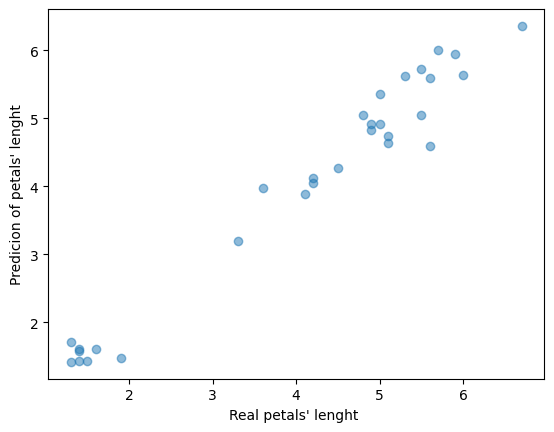

In [29]:
# Evaluate the model
test_loss, test_mae = model_iris.evaluate(x_test, y_test)
print(f"Mean Absolute Error: {test_mae:.2f}")

# Prediction
y_pred = model_iris.predict(x_test)

# Visualize the result
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Real petals' lenght ")
plt.ylabel("Predicion of petals' lenght")
plt.title("")
plt.show()